PROBLEM: Employee satisfaction bisa berpengaruh terhadap kinerja kerja dan akan berdampak terhadap KPI dalam perusahaan
oleh karena itu, dalam project ini, saya ingin melihat apa saja yang dapat dilakukan oleh HR dalam hiring agar kecenderungan staff yang akan direkrut adalah staff yang akan memiliki tingkat kepuasan kerja tinggi di dalam perusahaan tersebut


PROJECT: project ini akan dilakukan untuk memprediksi faktor apa saja yang membuat seorang staff puas bekerja di perusahaan tsb.

Python Packages

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

DESCRIBING AND CLEANING DATA

In [30]:
df = pd.read_csv('satisfaction.csv',index_col=1)

In [31]:
df.head()

,Unnamed: 0,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
emp_id,,,,,,,,,,,,,
HR8270,0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
TECH1860,1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
TECH6390,2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
SAL6191,3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
HR6734,4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


In [32]:
df.describe()

,Unnamed: 0,age,job_level,rating,onsite,awards,certifications,salary,satisfied
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,249.500000,38.610000,3.032000,3.072000,0.466000,4.538000,0.496000,50416.056000,0.526000
std,144.481833,9.438648,1.423738,1.425089,0.499342,2.853215,0.500485,23671.392661,0.499824
min,0.000000,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000,24076.000000,0.000000
25%,124.750000,30.000000,2.000000,2.000000,0.000000,2.000000,0.000000,29805.000000,0.000000
50%,249.500000,39.000000,3.000000,3.000000,0.000000,5.000000,0.000000,42419.000000,1.000000
75%,374.250000,47.000000,4.000000,4.000000,1.000000,7.000000,1.000000,65715.000000,1.000000
max,499.000000,54.000000,5.000000,5.000000,1.000000,9.000000,1.000000,86750.000000,1.000000


In [33]:
df.nunique()

Unnamed: 0          500
age                  32
Dept                  5
location              2
education             2
recruitment_type      4
job_level             5
rating                5
onsite                2
awards               10
certifications        2
salary                5
satisfied             2
dtype: int64

In [34]:
df.describe(include='O')

,Dept,location,education,recruitment_type
count,500,500,500,500
unique,5,2,2,4
top,Purchasing,City,PG,On-Campus
freq,109,259,254,133


No Null.. data bersih sehingga tidak diperlukan Null Handling

In [35]:
df.isna().sum()

Unnamed: 0          0
age                 0
Dept                0
location            0
education           0
recruitment_type    0
job_level           0
rating              0
onsite              0
awards              0
certifications      0
salary              0
satisfied           0
dtype: int64

Data mendekati 50:50 dan cukup balanced, sehingga tidak diperlukan balancing

In [36]:
df['satisfied'].value_counts()

1    263
0    237
Name: satisfied, dtype: int64

(array([237.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 263.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

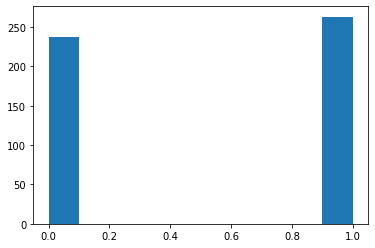

In [37]:
plt.figure()
plt.hist(df['satisfied'])

Checking outliers

outliers yang akan saya check adalah Age dan Salary dimana kedua feature tersebut adalah yang memiliki kemungkinan tertinggi terdapat outlier
namun data dibawah tidak diperlukan handling outliers karena tidak ada yang berada di luar lower dan upper fence

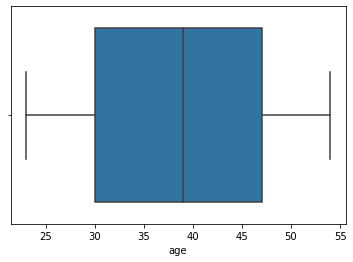

In [38]:
sns.boxplot(df['age'])

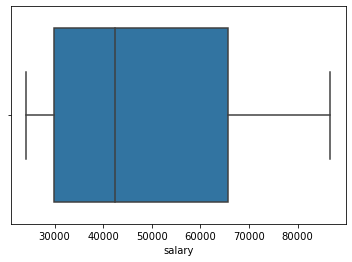

In [39]:
sns.boxplot(df['salary'])

Distribution Checking

Distribution checking saya lakukan hanya untuk mengamati data. namun, tidak akan banyak berpengaruh pada model dikarenakan yang saya akan lakukan adalah klasifikasi..
selain itu, melihat struktur perusahaan yang seperti piramida (banyak staff dibawah dan semakin sedikit staff upper management), maka distribusi akan cenderung skewed ke kiri (bawah)

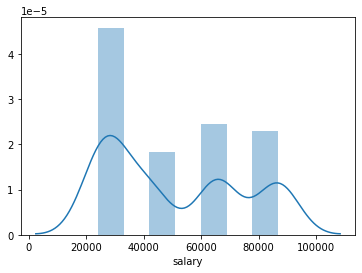

In [40]:
plt.figure()
sns.distplot(df['salary'])

pada distribusi usia, seperti yang terjadi pada umumnya, usia yang terdapat di perusahaan adalah usia produktif. sehingga distribusi berada di tengah (bell curve)

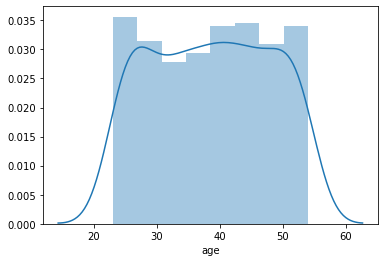

In [41]:
plt.figure()
sns.distplot(df['age'])

(array([241.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 259.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

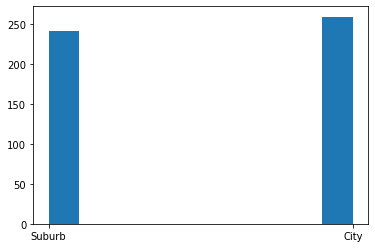

In [42]:
plt.figure()
plt.hist(df['location'])

perbandingan antara beberapa feature terhadap kepuasan staff

Age dan satisfaction:
tingkat kepuasan tertinggi berada pada usia 32 tahun
tingkat kepuasan terendah berada pada usia 43 tahun
namun hal tersebut tidak merefleksikan adanya kecenderungan usia terhadap 

In [43]:
age = df[['age','satisfied']].groupby(['age']).mean()

In [44]:
age

,satisfied
age,
23,0.583333
24,0.526316
25,0.315789
26,0.421053
27,0.500000
28,0.533333
29,0.727273
30,0.352941
31,0.538462


In [45]:

age.max()

satisfied    0.8
dtype: float64

In [46]:
age.min()

satisfied    0.25
dtype: float64

Salary and satisfaction: melihat antara gaji dan kepuasan, tidak ada kecenderungan yang berarti antara gaji, apabila melihat bahwa gaji terendah memiliki rata-rata tingkat kepuasan yang hampir sama dengan gaji tertinggi.

In [47]:
salary = df[['salary','satisfied']].groupby(['salary']).mean()
salary

,satisfied
salary,
24076,0.568421
29805,0.481818
42419,0.500000
65715,0.518182
86750,0.563107


Department dan satisfaction: melihat data di bawah, departemen sepertinya tidak berpengaruh banyak, namun marketing terlihat memiliki tingkat kepuasan kerja yang paling rendah

In [48]:
dept = df[['Dept','satisfied']].groupby(['Dept']).mean()
dept

,satisfied
Dept,
HR,0.500000
Marketing,0.463158
Purchasing,0.568807
Sales,0.554348
Technology,0.540816


Job Level dan satisfaction: melihat data di bawah, job level memiliki rata-rata kepuasan yang hampir sama antara satu dengan yang lainnya, namun job level 2 adalah job level dengan tingkat kepuasan terendah, sedangkan job level 1 dan 5 memiliki tingkat kepuasan tertinggi.

In [49]:
level = df[['job_level','satisfied']].groupby(['job_level']).mean()
level

,satisfied
job_level,
1,0.568421
2,0.481818
3,0.500000
4,0.518182
5,0.563107


rating dan satisfaction: melihat data dibawah, sepertinya dugaan saya dimana kepuasan staff akan merefleksikan pada kinerja dan akan juga merefleksikan terhadap KPI dan kinerja perusahaan.

In [50]:
rating = df[['rating','satisfied']].groupby(['rating']).mean()
rating

,satisfied
rating,
1,0.463158
2,0.515152
3,0.471264
4,0.557522
5,0.603774


tingkat pendidikan dan satisfaction: melihat data dibawah, kedua tingkat pendidikan (postgrad vs undergrad) memiliki kecenderungan rata-rata kepuasan yang mirip dengan perbedaan sekitar 0.02 poin

In [51]:
edu = df[['education','satisfied']].groupby(['education']).mean()
edu

,satisfied
education,
PG,0.539370
UG,0.512195


lokasi dan satisfaction: melihat data dibawah, kedua lokasi tempat tinggal juga memiliki tingkat kepuasan serupa. dugaan saya adalah yang tinggal di tengah kota lebih dekat untuk mencapai tempat kerja sehingga tidak habis waktu di jalan. namun dugaan saya hanya berupa dugaan melihat tidak adanya data mengenai posisi kantor

In [52]:
loc = df[['location','satisfied']].groupby(['location']).mean()
loc

,satisfied
location,
City,0.540541
Suburb,0.510373


awards memiliki kencederungan acak dimana tidak adanya kecenderungan semakin rendah awards semakin tinggi tingkat kepuasan, ataupun sebaliknya.

In [54]:
awr = df[['awards','satisfied']].groupby(['awards']).mean()
awr

,satisfied
awards,
0,0.615385
1,0.512195
2,0.395833
3,0.438596
4,0.568627
5,0.519231
6,0.586957
7,0.640000
8,0.464286


In [55]:
ons = df[['onsite','satisfied']].groupby(['onsite']).mean()
ons

,satisfied
onsite,
0,0.513109
1,0.540773
